# Seismic noise plot
Plotting seismic noise. ObsPy, numpy, pandas, matplotlib are required.

## Import NumPy, matplotlib, pandas, obspy module

In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import obspy as op

print("# numpy version = ",np.__version__)
print("# matplotlib version = ",mpl.__version__)
print("# pandas version = ",pd.__version__)
print("# numpy version = ",np.__version__)
print("# obspy version = ",op.__version__)

import matplotlib.pyplot as plt
from obspy import UTCDateTime



# numpy version =  1.18.1
# matplotlib version =  3.1.3
# pandas version =  1.0.1
# numpy version =  1.18.1
# obspy version =  1.2.2


## Frequency band
This example uses a 4.0-14.0 passband 

In [2]:
band = "4.0-14.0"

## Location of CSV file 
This example uses the ftp directory

In [3]:
csv_dir = "http://ncedc.org/ftp/outgoing/taira/EastBay_seismic_noise"


## Station information
This example uses BK.BRK.00.HHZ

In [4]:
net = "BK" # network ID
sta = "BRK" # station ID
#sta = "BKS"
loc = "00" # location ID
com = "HHZ" # channel ID

nslc = net+"."+sta+"."+loc+"."+com
print("# nslc = ", nslc)

# nslc =  BK.BRK.00.HHZ


## CSV file
This csv file includes seismic noise at several different frequency bands. Timestamp is UTC

In [5]:
csv_fi = csv_dir+"/"+net+"."+sta+"."+loc+"."+com+".csv"


## "RS" CSV file
This rs csv file includes 1-day median noise level (from 6am through 4pm at local time) at the 4.0-14.0 Hz. Timestamp is UTC

In [6]:
#http://ncedc.org/ftp/outgoing/taira/EastBay_seismic_noise/BK.BRK.00.HHZ_4.0-14.0_rs.csv
rs_csv_fi = csv_dir+"/"+net+"."+sta+"."+loc+"."+com+"_"+band+"_rs.csv"


## Read CSV file

In [7]:
csv_data = pd.read_csv(csv_fi,   
                       sep=",", index_col=0)

csv_data['time'] = pd.to_datetime(csv_data.index)

#print(csv_data)


## Read "RS" CSV file

In [8]:
rs_csv_data = pd.read_csv(rs_csv_fi,   
                       sep=",", index_col=0)
#print(rs_csv_data)
rs_csv_data['time'] = pd.to_datetime(rs_csv_data.index)

#print(rs_csv_data['time'])

## Plotting data
Data are plotted at UTC timestamp. Red dashed line: When Bay Area shulter-in-place order was issued (2020-03-17 00:00 local time -> 2020-03-17 07:00 UTC)

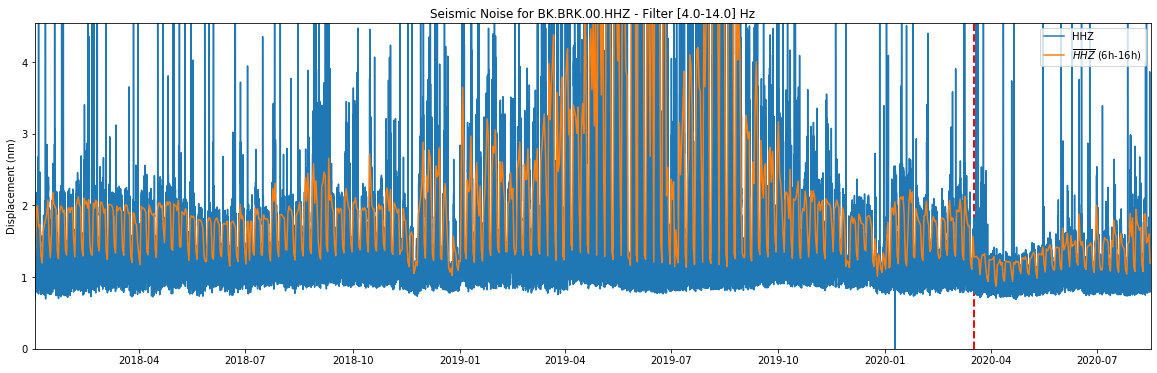

In [9]:
plt.figure(figsize=(20, 6))

# 1e+9 for conveting meter -> nanometer
plt.plot(csv_data['time'], csv_data[band]*1e+9, label=com)
plt.plot(rs_csv_data['time'], rs_csv_data[band]*1e+9, label="$\overline{"+com+"}$ (6h-16h)")

#plt.ylim(0.75,3)
ymin = 0
ymax = np.nanpercentile(csv_data[band]*1e+9,95)*1.5
plt.ylim(ymin, ymax)

#2020-03-17 00:00":'BayArea shelter-in-place order' local time
plt.vlines(x=(UTCDateTime("2020-03-17 07:00").datetime), ymin=ymin, ymax=ymax, color="red", linewidth = 2.0, linestyle = "--")




plt.xlim(csv_data['time'][0], csv_data['time'][-1])
plt.ylabel("Displacement (nm)")
plt.title("Seismic Noise for "+nslc+" - Filter ["+band+"] Hz")


plt.legend(loc = "upper right")
plt.savefig(nslc+"_"+band+".png")

